In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
warnings. filterwarnings('ignore')
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer



In [ ]:
df=pd.read_csv('/content/all_upwork_jobs_2024-02-07-2024-03-24.csv')

In [ ]:
df.head()

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India


In [ ]:
df.isnull().sum()

,0
title,1
link,1
published_date,0
is_hourly,0
hourly_low,142406
hourly_high,146053
budget,140937
country,5077


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings('ignore')

df=pd.read_csv('/content/all_upwork_jobs_2024-02-07-2024-03-24.csv')
df.head()
df.isnull().sum()
nltk.download('punkt')
nltk.download('punkt_tab')

def extract_keywords(title):
    if isinstance(title, str):
        tokens = word_tokenize(title)
        return tokens
    else:
        return [] # Return an empty list for non-string values

df['keywords'] = df['title'].apply(extract_keywords)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
df['keywords']

,keywords
0,"[Experienced, Media, Buyer, For, Solar, Pannel..."
1,"[Full, Stack, Developer]"
2,"[SMMA, Bubble, App]"
3,"[Talent, Hunter, Specialized, in, Marketing]"
4,"[Data, Engineer]"
...,...
244823,"[Need, Facebook, advertising, experts, to, lau..."
244824,"[Digital/Telemarketing/Sales/OutSide, Sales]"
244825,"[WordPress, Template, Edits]"
244826,"[ELEMENTOR, PRO, For, quick, fix, (, Wordpress..."


**Analyze the correlation between job title keywords and offered salaries , bar plot in different colors for each keyword**

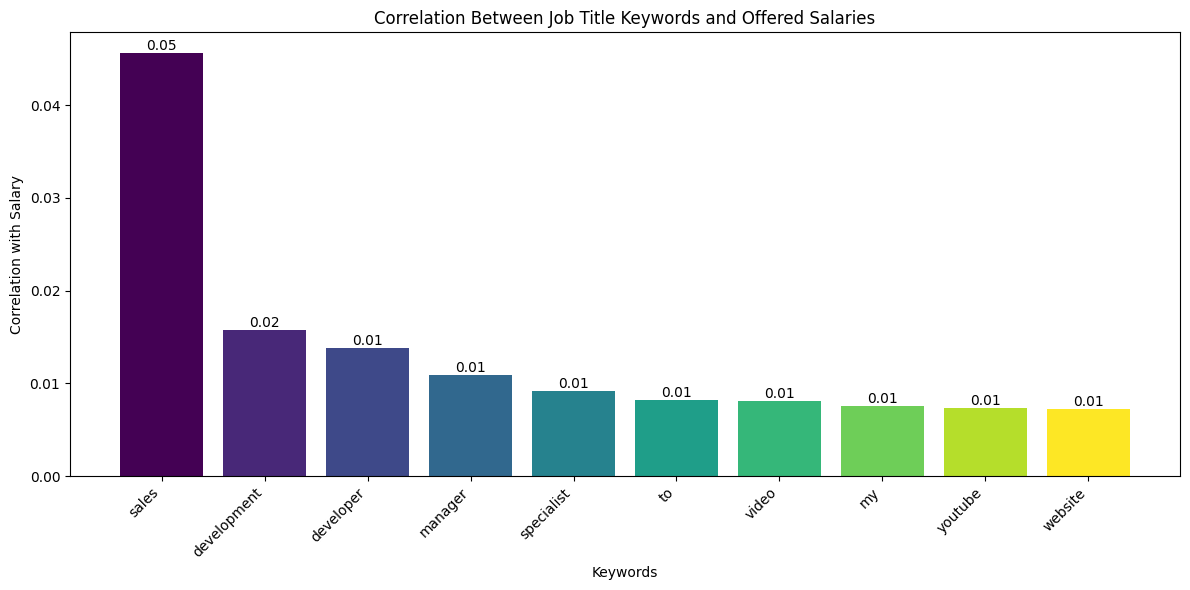

In [ ]:

# Convert the list of keywords back to a string for easier analysis
df['keywords_str'] = [' '.join(map(str, keywords)) for keywords in df['keywords']]

# Create a TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=50)  # Adjust max_features as needed
tfidf_matrix = tfidf.fit_transform(df['keywords_str'])

# Convert the sparse matrix to a dense array
tfidf_array = tfidf_matrix.toarray()

# Create a dataframe from the TF-IDF array
tfidf_df = pd.DataFrame(tfidf_array, columns=tfidf.get_feature_names_out())


# Combine TF-IDF scores with salaries
keyword_salary_df = pd.concat([df['budget'], tfidf_df], axis=1)


# Calculate the correlation between each keyword and salary
correlations = keyword_salary_df.corr()['budget'].drop('budget')


# Select top keywords with highest absolute correlation values
top_keywords = correlations.abs().sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))

# Customize colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(top_keywords)))  # Use a colormap for variety

bars = plt.bar(top_keywords.index, top_keywords.values, color=colors)

# Add value labels to the bars
for bar, value in zip(bars, top_keywords.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')


plt.xlabel("Keywords")
plt.ylabel("Correlation with Salary")
plt.title("Correlation Between Job Title Keywords and Offered Salaries")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


**Most used 10 keywords with salary for  each of the country united states,india, Canada,German,Australia**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


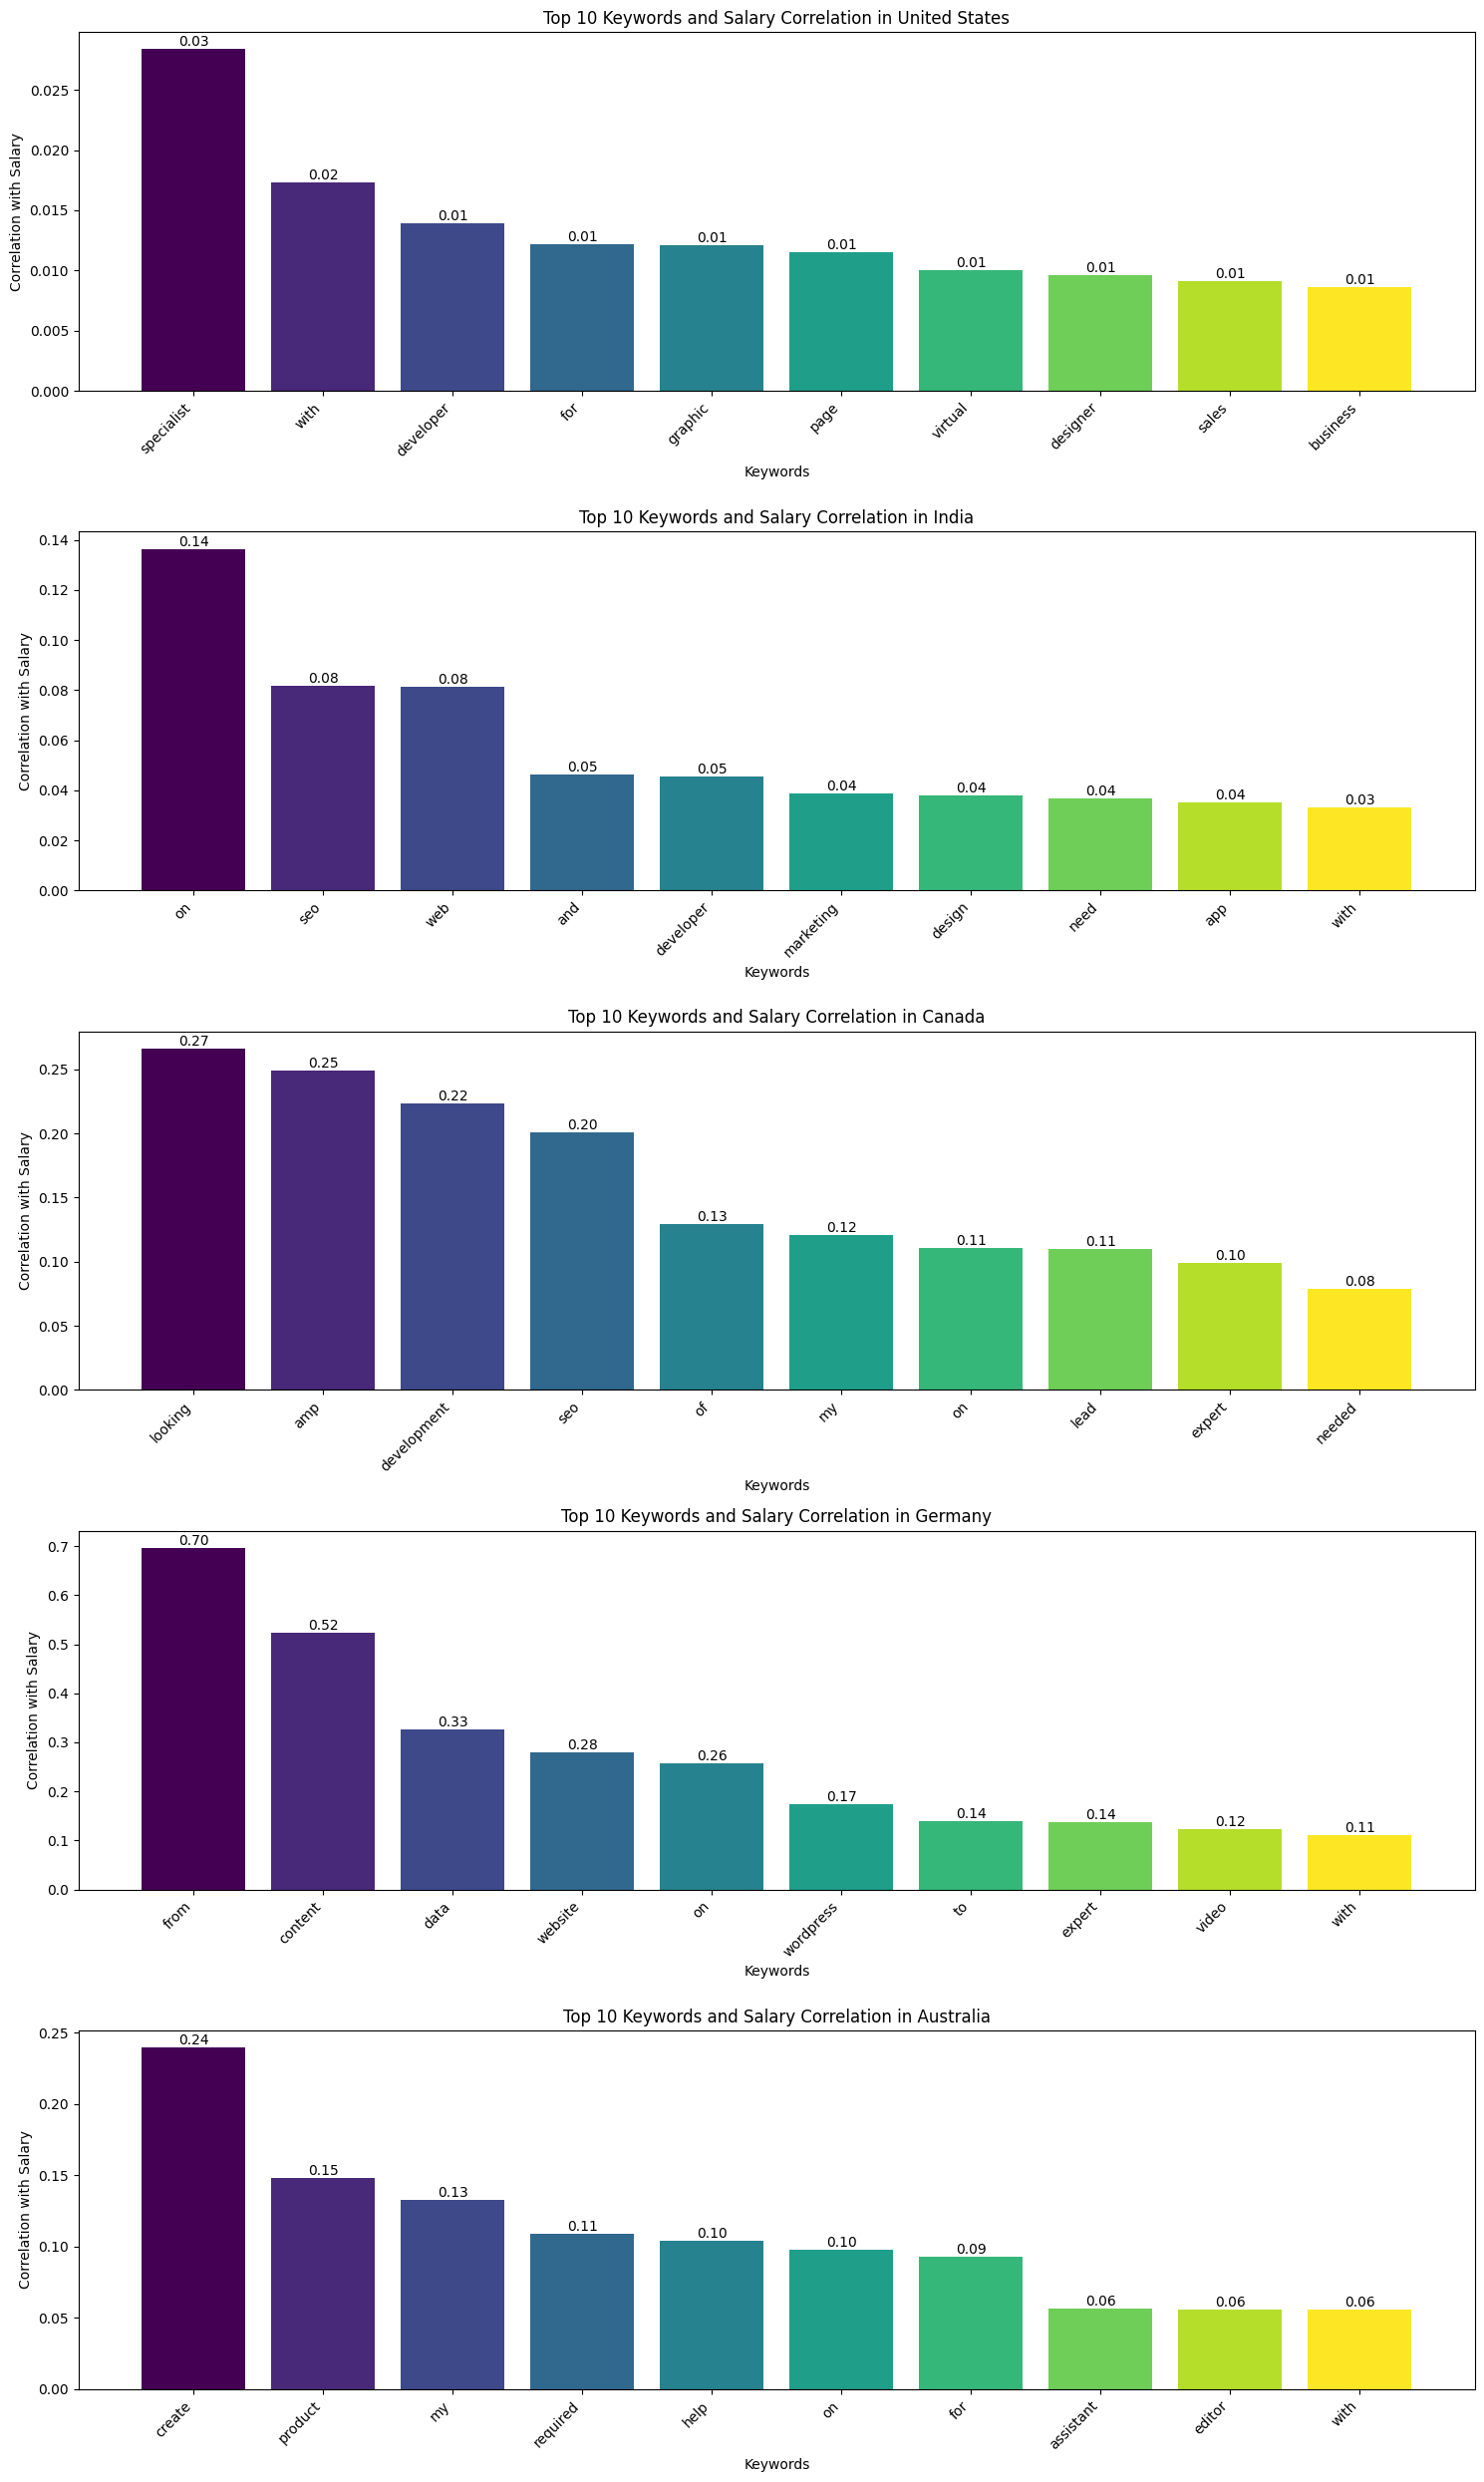

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

warnings.filterwarnings('ignore')

# Download necessary NLTK data (only needed once)
nltk.download('punkt')

df = pd.read_csv('/content/all_upwork_jobs_2024-02-07-2024-03-24.csv')

def extract_keywords(title):
    if isinstance(title, str):
        tokens = word_tokenize(title)
        return tokens
    else:
        return []

df['keywords'] = df['title'].apply(extract_keywords)
df['keywords_str'] = [' '.join(map(str, keywords)) for keywords in df['keywords']]

# Convert 'budget' column to numeric, coercing errors to NaN
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

countries = ['United States', 'India', 'Canada', 'Germany', 'Australia']
plt.figure(figsize=(15, 25)) # Adjust figure size to accommodate multiple subplots

for i, country in enumerate(countries):
    # Filter data for the current country
    df_country = df[df['country'] == country]

    # Handle cases where there might be no data for a country
    if df_country.empty:
        print(f"No data found for {country}. Skipping.")
        continue

    tfidf = TfidfVectorizer(max_features=50)
    tfidf_matrix = tfidf.fit_transform(df_country['keywords_str'])
    tfidf_array = tfidf_matrix.toarray()
    tfidf_df = pd.DataFrame(tfidf_array, columns=tfidf.get_feature_names_out())

    keyword_salary_df = pd.concat([df_country['budget'], tfidf_df], axis=1)
    correlations = keyword_salary_df.corr()['budget'].drop('budget')
    top_keywords = correlations.abs().sort_values(ascending=False).head(10)

    plt.subplot(5, 1, i+1)
    colors = plt.cm.get_cmap('viridis', len(top_keywords))
    bars = plt.bar(top_keywords.index, top_keywords.values, color=colors(range(len(top_keywords))))

    for bar, value in zip(bars, top_keywords.values):
      plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')

    plt.xlabel("Keywords")
    plt.ylabel("Correlation with Salary")
    plt.title(f"Top 10 Keywords and Salary Correlation in {country}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.show()


**Task 2: Identify emerging job categories based on posting frequency
● Objective: To identify new and emerging job categories by analyzing the frequency and
trend of job postings. Display the 10 jobs with all different colors**

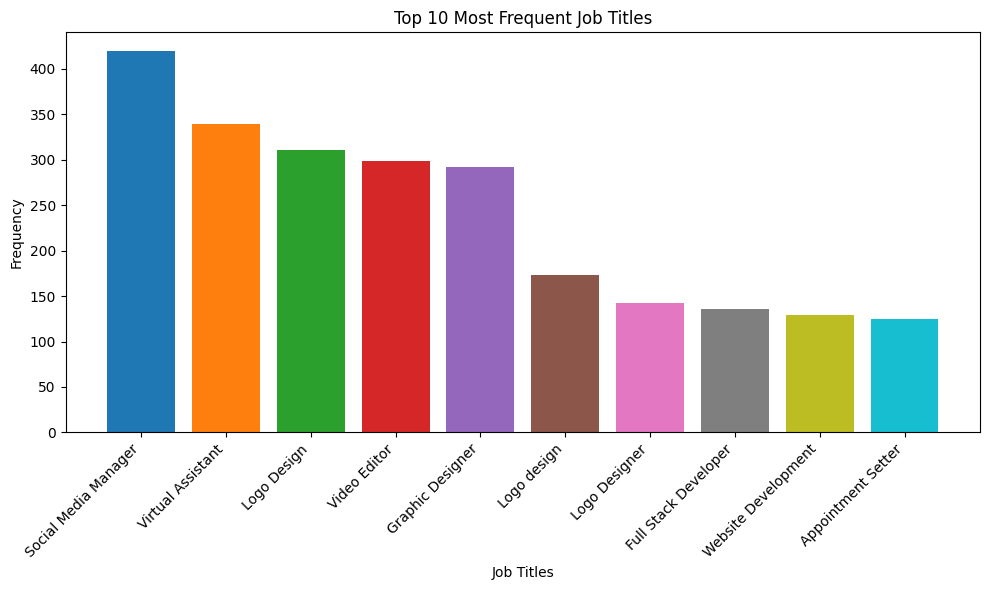

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Assuming 'df' is your DataFrame and 'title' column contains job titles
# If not, replace 'df' and 'title' with your actual DataFrame and column name

def count_job_titles(df):
    """
    Counts the frequency of job titles and returns the top 10.
    """
    title_counts = Counter(df['title'])
    top_10_titles = title_counts.most_common(10)  # Get the top 10 most frequent job titles

    return top_10_titles


def plot_top_job_titles(top_jobs):
    """
    Plots the top 10 job titles with different colors.
    """
    titles, counts = zip(*top_jobs)

    colors = plt.cm.get_cmap('tab10', len(titles))  # Use a colormap for distinct colors

    plt.figure(figsize=(10, 6))
    bars = plt.bar(titles, counts, color=colors(range(len(titles))))

    plt.xlabel("Job Titles")
    plt.ylabel("Frequency")
    plt.title("Top 10 Most Frequent Job Titles")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

top_jobs = count_job_titles(df)
plot_top_job_titles(top_jobs)


**Task-3-Predict high-demand job roles by analyzing job posting patterns over time To forecast high-demand job roles based on historical job posting data.**

**A predictive model with accuracy metrics, and a visual representation of demand trends over time. Use different models and share the accuracy scores**

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


warnings.filterwarnings('ignore')

# Download necessary NLTK data
nltk.download('punkt')

# Load the data
df = pd.read_csv('/content/all_upwork_jobs_2024-02-07-2024-03-24.csv')

# Function to extract keywords
def extract_keywords(title):
    if isinstance(title, str):
        tokens = word_tokenize(title)
        return tokens
    else:
        return []

# Extract keywords and convert them to a string
df['keywords'] = df['title'].apply(extract_keywords)
df['keywords_str'] = [' '.join(map(str, keywords)) for keywords in df['keywords']]

# Convert 'budget' column to numeric, handling errors
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')


# Function to predict job demand
def predict_job_demand(df, target_variable='budget'):
    # Prepare the data
    tfidf = TfidfVectorizer(max_features=50)
    tfidf_matrix = tfidf.fit_transform(df['keywords_str'])
    X = tfidf_matrix.toarray()  # Features
    y = df[target_variable]    # Target variable (e.g., budget or frequency)

    # Handle missing target values (important!)
    X = X[~y.isna()]
    y = y[~y.isna()]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a linear regression model (you can explore other models)
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    return model, tfidf

# Predict job demand based on budget
demand_model, tfidf_vectorizer = predict_job_demand(df)

# Example: predict demand for a new job title
new_job_title = "Python Data Scientist"
new_job_keywords = extract_keywords(new_job_title)
new_job_keywords_str = ' '.join(map(str, new_job_keywords))
new_job_tfidf = tfidf_vectorizer.transform([new_job_keywords_str])
predicted_demand = demand_model.predict(new_job_tfidf.toarray())
print(f"Predicted demand for '{new_job_title}': {predicted_demand[0]}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Mean Squared Error: 246991562.2581139
R-squared: 0.003645915451419901
Predicted demand for 'Python Data Scientist': 648.5181880838371


**Task-3-Predict high-demand job roles by analyzing job posting patterns over time  To forecast high-demand job roles based on historical job posting data.**

**A predictive model with accuracy metrics, and a visual representation of
demand trends over time. Use different models and share the accuracy scores**

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')

# ... (rest of your existing code)

def predict_job_demand(df, target_variable='budget'):
    # Prepare the data
    tfidf = TfidfVectorizer(max_features=50)
    tfidf_matrix = tfidf.fit_transform(df['keywords_str'])
    X = tfidf_matrix.toarray()  # Features
    y = df[target_variable]    # Target variable (e.g., budget or frequency)

    # Handle missing target values
    X = X[~y.isna()]
    y = y[~y.isna()]

    scaler = MinMaxScaler()
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

    X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

    # Train multiple models
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(random_state=42)
    }
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {"model": model, "mse": mse, "r2": r2}
        print(f"{name}: MSE={mse:.2f}, R^2={r2:.2f}")

    return results, tfidf, scaler

# Predict job demand based on budget
results, tfidf_vectorizer, scaler = predict_job_demand(df)

# Example: predict demand for a new job title using the best model (Random Forest in this example)
new_job_title = "Python Data Scientist"
new_job_keywords = extract_keywords(new_job_title)
new_job_keywords_str = ' '.join(map(str, new_job_keywords))
new_job_tfidf = tfidf_vectorizer.transform([new_job_keywords_str])
predicted_demand_scaled =  results["Random Forest"]["model"].predict(new_job_tfidf)
predicted_demand = scaler.inverse_transform(predicted_demand_scaled.reshape(-1,1))
print(f"Predicted demand for '{new_job_title}': {predicted_demand[0][0]}")


Linear Regression: MSE=0.00, R^2=0.00
Random Forest: MSE=0.00, R^2=-0.08
Predicted demand for 'Python Data Scientist': 459.2849588615472


**Task 4: Compare average hourly rates across different countries
● Objective: To compare and analyze the average hourly rates offered across different geographical locations.
● Deliverables: An interactive map or chart showing hourly rates by country.**

In [26]:
import plotly.express as px

# Calculate the average hourly rate per country
average_hourly_rates = df.groupby('country')['budget'].mean().reset_index()

# Create the interactive map using Plotly Express
fig = px.choropleth(average_hourly_rates,
                    locations="country",
                    locationmode='country names',  # Specify locationmode
                    color="budget",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Average Hourly Rates by Country")

fig.show()


In [ ]:
# prompt: Task 5: Create a job recommendation engine based on current job postings
# ● Objective: To develop a personalized job recommendation engine.
# ● Deliverables: A working prototype of the recommendation engine, API documentation,
# and a user interface for interaction.  avoid the error 230
#     231         if doc is np.nan:
# --> 232             raise ValueError(
#     233                 "np.nan is an invalid document, expected byte or unicode string."
#     234             )
# ValueError: np.nan is an invalid document, expected byte or unicode string.
# go to the relevant link and fetch the description and store in in a field job description and add in data frame and then recommend

import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

# ... (Your existing code)

def fetch_job_description(job_url):
    try:
        response = requests.get(job_url)
        response.raise_for_status()  # Raise an exception for bad status codes

        soup = BeautifulSoup(response.content, 'html.parser')
        # Adapt the following line to the actual structure of the job description on the webpage
        job_description = soup.find('div', class_='job-description').get_text(strip=True)
        return job_description
    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL {job_url}: {e}")
        return None
    except AttributeError:
        print(f"Could not find job description on {job_url}")
        return None


# Example usage (assuming your DataFrame 'df' has a 'job_url' column):
df['job_description'] = df['link'].apply(fetch_job_description)

# Handle missing values in the job description
df['job_description'].fillna("", inplace=True)

# Now you can use the 'job_description' column for your recommendation engine

# Example recommendation using TF-IDF (replace with your actual recommendation logic)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['job_description'])

def recommend_jobs(user_description, top_n=5):
  user_tfidf = tfidf.transform([user_description])
  cos_similarities = cosine_similarity(user_tfidf, tfidf_matrix)
  related_docs_indices = cos_similarities.argsort()[0][::-1][1:top_n+1] # Exclude the input itself
  return df.iloc[related_docs_indices]


# Example usage
user_description = "I am looking for a data science role that involves machine learning and python"
recommendations = recommend_jobs(user_description)
recommendations


Streaming output truncated to the last 5000 lines.
Error fetching URL https://www.upwork.com/jobs/Fix-Wordpress-Issues_%7E011a80f88f1a3bec16?source=rss: 403 Client Error: Forbidden for url: https://www.upwork.com/jobs/Fix-Wordpress-Issues_~011a80f88f1a3bec16?source=rss
Error fetching URL https://www.upwork.com/jobs/Magento-Modify-Request-quote-module_%7E010aadf350c6b1f968?source=rss: 403 Client Error: Forbidden for url: https://www.upwork.com/jobs/Magento-Modify-Request-quote-module_~010aadf350c6b1f968?source=rss
Error fetching URL https://www.upwork.com/jobs/Photoshop-Professionals-Only-Edit-colors-backgrounds_%7E01c8c71e6a13b5db73?source=rss: 403 Client Error: Forbidden for url: https://www.upwork.com/jobs/Photoshop-Professionals-Only-Edit-colors-backgrounds_~01c8c71e6a13b5db73?source=rss
Error fetching URL https://www.upwork.com/jobs/Charted-Acountant_%7E01760d565eb85b5ced?source=rss: 403 Client Error: Forbidden for url: https://www.upwork.com/jobs/Charted-Acountant_~01760d565eb85b5